# Minimal example with TensorFlow 2.0

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [3]:
observations = 1000

xs = np.random.uniform(10,-10,(observations,1))
zs = np.random.uniform(10,-10,(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Solving with TensorFlow

In [4]:
training_data = np.load('TF_intro.npz')

In [7]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 0s - loss: 38.4356
Epoch 2/100
1000/1000 - 0s - loss: 4.6808
Epoch 3/100
1000/1000 - 0s - loss: 1.5246
Epoch 4/100
1000/1000 - 0s - loss: 0.6679
Epoch 5/100
1000/1000 - 0s - loss: 0.4247
Epoch 6/100
1000/1000 - 0s - loss: 0.3726
Epoch 7/100
1000/1000 - 0s - loss: 0.3499
Epoch 8/100
1000/1000 - 0s - loss: 0.3479
Epoch 9/100
1000/1000 - 0s - loss: 0.3435
Epoch 10/100
1000/1000 - 0s - loss: 0.3440
Epoch 11/100
1000/1000 - 0s - loss: 0.3381
Epoch 12/100
1000/1000 - 0s - loss: 0.3500
Epoch 13/100
1000/1000 - 0s - loss: 0.3381
Epoch 14/100
1000/1000 - 0s - loss: 0.3427
Epoch 15/100
1000/1000 - 0s - loss: 0.3465
Epoch 16/100
1000/1000 - 0s - loss: 0.3499
Epoch 17/100
1000/1000 - 0s - loss: 0.3445
Epoch 18/100
1000/1000 - 0s - loss: 0.3455
Epoch 19/100
1000/1000 - 0s - loss: 0.3512
Epoch 20/100
1000/1000 - 0s - loss: 0.3452
Epoch 21/100
1000/1000 - 0s - loss: 0.3497
Epoch 22/100
1000/1000 - 0s - loss: 0.3380
Epoch 23/100
1000/1000 - 0s - loss: 0.34

## Extract the weights and bias

In [8]:
model.layers[0].get_weights()

[array([[ 1.9922768],
        [-2.9775364]], dtype=float32),
 array([5.025327], dtype=float32)]

## Extract the outputs(make predictions)

In [11]:
model.predict_on_batch(training_data['inputs'])

<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[ -6.341829  ],
       [ 13.141226  ],
       [  5.8725924 ],
       [ 27.802097  ],
       [  9.076502  ],
       [ 29.82582   ],
       [  4.5401564 ],
       [ -1.4435458 ],
       [ -3.5093083 ],
       [ -4.096379  ],
       [ 13.196447  ],
       [ 10.452614  ],
       [-18.139578  ],
       [-14.401779  ],
       [-27.242311  ],
       [-17.914352  ],
       [ 13.31011   ],
       [ -5.3788323 ],
       [-35.226334  ],
       [ -4.4796777 ],
       [ 13.112007  ],
       [-24.73524   ],
       [-10.000729  ],
       [ 11.465967  ],
       [ 15.064503  ],
       [ 15.9580555 ],
       [-24.364113  ],
       [ 23.292822  ],
       [ 17.118343  ],
       [  0.49661207],
       [ 16.704456  ],
       [ 30.344513  ],
       [-24.494154  ],
       [ 43.855564  ],
       [  5.653546  ],
       [ -9.94779   ],
       [-11.7992935 ],
       [-18.85608   ],
       [-26.889906  ],
       [-38.485836  ],
       [ 22.351126  ],
      

In [12]:
training_data['targets'].round(1)

array([[ -6. ],
       [ 13.2],
       [  6.8],
       [ 28.5],
       [  8.7],
       [ 29.8],
       [  4.9],
       [ -1.8],
       [ -3.8],
       [ -4.2],
       [ 13. ],
       [ 10.5],
       [-18.3],
       [-15.5],
       [-26.7],
       [-18.8],
       [ 14.3],
       [ -4.8],
       [-36.1],
       [ -5. ],
       [ 13.6],
       [-24.3],
       [-10.8],
       [ 10.6],
       [ 15.1],
       [ 16.1],
       [-25. ],
       [ 23. ],
       [ 16.2],
       [ -0.4],
       [ 15.9],
       [ 31.1],
       [-24. ],
       [ 43.7],
       [  6.4],
       [ -9.9],
       [-12.3],
       [-19. ],
       [-26.3],
       [-38.5],
       [ 23.5],
       [ 21.5],
       [ -2. ],
       [ 32.6],
       [-25.8],
       [ -8.7],
       [-21.9],
       [ -1.1],
       [ 33.2],
       [ 17.5],
       [ 12.7],
       [-16.2],
       [ -1.8],
       [ -5. ],
       [-12. ],
       [-24.2],
       [ 28.5],
       [ -5.1],
       [ 19.3],
       [-19.1],
       [ -0.6],
       [ 10.7],
       [

## Plotting the data

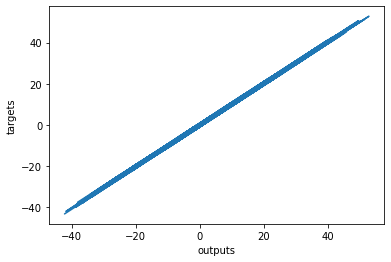

In [13]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()